In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import xgboost as xg

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [7]:
df['Country'].nunique()

37

In [8]:
df = df.drop(columns=['InvoiceNo','InvoiceDate'])

In [9]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1583,144,3,3.75,14056.0,35
1,1300,3682,6,1.95,13098.0,35
2,2178,1939,4,5.95,15044.0,35
3,2115,2983,1,0.83,15525.0,35
4,1210,2886,12,1.65,13952.0,35


In [10]:
df.isnull().sum() ## for checking null values #data is clean when it is null

StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1583,144,3,3.75,14056.0,35
1,1300,3682,6,1.95,13098.0,35
2,2178,1939,4,5.95,15044.0,35
3,2115,2983,1,0.83,15525.0,35
4,1210,2886,12,1.65,13952.0,35


In [13]:
#df = df.abs()

In [14]:
df.describe()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,243302.000000,243302.000000,243302.000000,243302.000000,243302.000000,243302.000000
mean,1581.782883,2020.272641,11.820170,3.483264,15284.644113,32.923326
std,840.492291,1094.440787,318.818396,84.260932,1708.308227,6.601590
min,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,960.000000,1130.000000,2.000000,1.250000,13924.000000,35.000000
50%,1543.000000,1990.500000,5.000000,1.950000,15189.000000,35.000000
75%,2115.000000,2949.000000,12.000000,3.750000,16782.000000,35.000000
max,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [15]:
df= df[df['Quantity']>0]

In [16]:
Q= df['Quantity'].quantile(0.99)

In [17]:
df=df[df['Quantity']<Q]

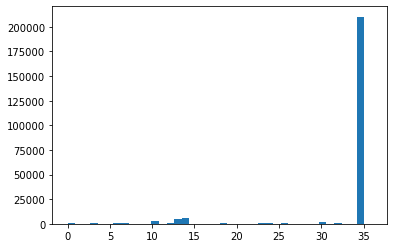

In [18]:
plt.hist(df['Country'], bins =40)
plt.show()

In [19]:
df= df[df['UnitPrice'].between(0, 500, inclusive=False)]

In [20]:
#df= df[df['Country']== 35]

In [21]:
df.describe()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,234724.000000,234724.000000,234724.000000,234724.000000,234724.000000,234724.000000
mean,1578.204930,2020.511729,9.576004,2.948012,15292.148085,32.986456
std,838.033606,1094.815604,13.457576,4.914686,1706.209750,6.498480
min,0.000000,0.000000,1.000000,0.001000,12347.000000,0.000000
25%,953.000000,1131.000000,2.000000,1.250000,13949.000000,35.000000
50%,1535.000000,1988.000000,5.000000,1.950000,15203.000000,35.000000
75%,2115.000000,2951.000000,12.000000,3.750000,16791.000000,35.000000
max,3683.000000,3895.000000,116.000000,490.250000,18287.000000,36.000000


In [22]:
import seaborn as sns

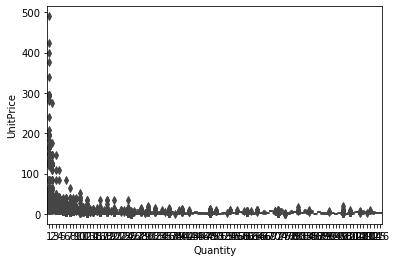

In [23]:
ax= sns.boxplot(x= 'Quantity', y = 'UnitPrice', data=df)

In [24]:
X= df[['Quantity','Description','Country']]
Y=df['UnitPrice']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train ,X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.25 , random_state= 1)

In [27]:
print(X_train.size,X_test.size)

528129 176043


In [28]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
train_dmatrix = xg.DMatrix(data = X_train, label = Y_train)

In [29]:
#from sklearn.linear_model import LinearRegression

In [30]:
#model1= LinearRegression().fit(X_train, Y_train)

In [31]:
# import numpy as np
# predictions= model1.predict (X_test)
# np.set_printoptions(suppress= True)
# print('Predicted_Labels:', np.round(predictions)[:10])
# print('Actual Labels:' ,  Y_test[:10])

In [32]:
# from sklearn.metrics import mean_squared_error,r2_score
# mse =mean_squared_error(Y_test, predictions)
# print('MSE:',mse)
# rmse = np.sqrt(mse)
# print('RMSE:', rmse)
# r2 = r2_score(Y_test,predictions)
# print('R2:', r2)

In [33]:
##Now we bring out the output from test csv

In [34]:
test_df = pd.read_csv('test.csv')

In [35]:
test_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [36]:
test_df = test_df[['Quantity','Description','Country']]

In [37]:
#test_df

In [38]:
# predictions2 = model1.predict(test_df)

In [39]:
# print(predictions2)

In [40]:
# predictions2

In [41]:
# final_op= pd.DataFrame(predictions2)
# final_op

In [42]:
# final_op.to_csv('submission_3.csv')

In [43]:
##MODEL2 with Decision Tree Regression

In [44]:
# from sklearn.ensemble import RandomForestRegressor
# model2 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=100, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)
# model2.fit(X_train,Y_train)

In [45]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
# test_dmatrix = xg.DMatrix(data = X_test, label = Y_test)

In [46]:
# # Parameter dictionary specifying base learner 
# param = {"booster":"gblinear", "objective":"reg:linear"} 
  
# xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 
# predictions4 = xgb_r.predict(test_dmatrix) 

In [47]:
xgb_r= xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
# Fitting the model 
xgb_r.fit(X_train, Y_train)
pred = xgb_r.predict(X_test)

In [48]:
# RMSE Computation 
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(Y_test, pred)) 
print("RMSE : % f" %(rmse))

RMSE :  3.840526


In [49]:
predictions10 = xgb_r.predict(test_df)

In [50]:
print(predictions10)

[3.3731863 2.414921  2.0857363 ... 2.0481062 3.3337736 3.4015172]


In [51]:
final_op10 = pd.DataFrame(predictions10)
final_op10

,0
0,3.373186
1,2.414921
2,2.085736
3,2.414921
4,5.323994
...,...
122044,1.553956
122045,1.668710
122046,2.048106
122047,3.333774


In [55]:
final_op10.to_csv('submission_23_XGB.csv')

In [53]:
# import numpy as np
# predictions4= model2.predict (X_test)
# np.set_printoptions(suppress= True)
# print('Predicted_Labels:', np.round(predictions4)[:10])
# print('Actual Labels:' ,  Y_test[:10])

In [54]:
# from sklearn.metrics import mean_squared_error,r2_score
# mse =mean_squared_error(Y_test, predictions4)
# print('MSE:',mse)
# rmse = np.sqrt(mse)
# print('RMSE:', rmse)
# r2 = r2_score(Y_test,predictions4)
# print('R2:', r2)